In [1]:
import sys
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from explain.xai_calc import create_eval_dataframe, compare_experiments, prepare_r, compare_r_testset
from explain.xai_dataloader import XAIDataLoader
from explain.xai_plot import plot_two_models_r_vs_k
from correlation_coefficient import compute_r

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [11]:
output_dir = "../output"
orig_gan = "original_GAN_xai_experiments"
aug_gan = "both_augmented_pix2pix_2_bs4_ep1_lambda1000_vanilla"
xai_res_dir = 'xai_results'
exp_names = ['test', 'xai_exp_ha', 'xai_exp_oiii','xai_exp_faint_ha',
             'xai_exp_random','xai_exp_random_ha','xai_exp_random_oiii',
             'xai_exp_occlusion']
ori_output_dir = os.path.join(output_dir, orig_gan)
aug_output_dir = os.path.join(output_dir, aug_gan)
ori_results_dir = os.path.join(ori_output_dir, xai_res_dir)#"../output/original_GAN_xai_experiments/xai_results/"
aug_results_dir = os.path.join(aug_output_dir, xai_res_dir)#"../output/original_GAN_xai_experiments/xai_results/"
names = ['test', 'xai_exp_ha', 'xai_exp_oiii', 'xai_exp_faint_ha' ]
nrun = 100
nindex = 1
suffix_list = [ "run{:d}_index{:d}".format(i, j) for i in range(nrun) for j in range(nindex) ]

In [3]:
orig_test, _ = create_eval_dataframe(ori_output_dir, exp_names[0], suffix_list, nbins=20, log_bins=True)

In [4]:
aug_test, k = create_eval_dataframe(aug_output_dir, exp_names[0], suffix_list, nbins=20, log_bins=True)

In [5]:
orig_mean = orig_test.mean()
aug_mean = aug_test.mean()
orig_std = orig_test.std()
aug_std = aug_test.std()
check = ['l1_mix', 'l1_ha', 'l1_oiii', 'rmse_mix', 'rmse_ha', 'rmse_oiii',
        'mean_fakeoiii','std_fakeoiii', 'sum_fakeoiii', 'max_fakeoiii']

In [6]:
for col in check:
    print("Original", col, orig_mean[col], orig_std[col])
    print("Augmented", col, aug_mean[col], aug_std[col])

Original l1_mix 2.33348380122284e-10 1.776797264672853e-11
Augmented l1_mix -3.701778089024216e-10 5.0054346472195335e-11
Original l1_ha 8.317107620599205e-10 5.760807497092544e-10
Augmented l1_ha -4.1989499919446135e-10 5.226646716768133e-10
Original l1_oiii -5.983624529919098e-10 5.695265592117822e-10
Augmented l1_oiii 4.97171814102556e-11 5.318879385816474e-10
Original rmse_mix 4.639918318837302e-10 4.8551220604797405e-11
Augmented rmse_mix 2.1215900178502105e-09 1.2659090257183883e-09
Original rmse_ha 5.0959263354665684e-09 4.0859578049062986e-10
Augmented rmse_ha 4.288544070209173e-09 7.673552784595124e-10
Original rmse_oiii 5.025181925865762e-09 3.9679356895410995e-10
Augmented rmse_oiii 4.571646969294746e-09 1.2352557004229259e-09
Original mean_fakeoiii 8.168800809116306e-09 8.832862739100547e-10
Augmented mean_fakeoiii 7.52072117471414e-09 7.898675116887041e-10
Original std_fakeoiii 5.252962105295467e-09 4.0715465782500805e-10
Augmented std_fakeoiii 4.239990183396714e-09 1.2667

In [7]:
o_mix_list, o_ha_list, o_oiii_list = compare_r_testset(ori_output_dir, exp_names[0])
a_mix_list, a_ha_list, a_oiii_list = compare_r_testset(aug_output_dir, exp_names[0])
#plot_all_r_vs_k(r_ha_list, ori_results_dir, title="Original correlation true fake test set")

Saved plot ../output/ha_augmented_pix2pix_2_bs4_ep1_lambda1000_vanilla/compare_orig_ha_augmented.png


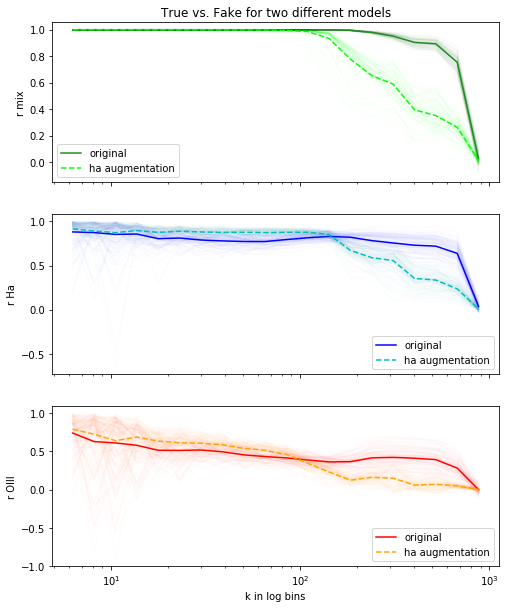

In [10]:
plot_two_models_r_vs_k(o_mix_list, o_ha_list, o_oiii_list, 
                       a_mix_list, a_ha_list, a_oiii_list, 
                       aug_output_dir, mod="both augmentation",
                       title="Compare orig both augmented")